In [1]:
import piplite
await piplite.install(['openpyxl==3.0.9']) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
filepath = "Compiled ECG Data 1st Trial.xlsx"
Sheet_Name = "Control"
df_cont = pd.read_excel(filepath, sheet_name = Sheet_Name, index_col=0)
df_cont = df_cont.rename(columns={'HR': 'HRControl', 'HRV': 'HRVControl', 'QRS': 'QRSControl', 'PR': 'PRControl', 'QTc': 'QTcControl'})
df_cont.head()

,HRControl,HRVControl,QRSControl,PRControl,QTcControl
Control,,,,,
Baseline,113.388,100.203,36.1820,56.3843,265.879
Day 1,102.936,128.175,36.4202,66.3688,273.072
Day 3,98.487,106.160,36.2308,61.8324,260.321
Day 5,111.863,121.740,35.8852,68.9134,281.528
Day 8,83.030,109.960,36.0870,56.9749,240.715


In [4]:
Sheet_Name = "Treatment"
df_treat = pd.read_excel(filepath, sheet_name = Sheet_Name, index_col=0)
df_treat = df_treat.rename(columns={'HR': 'HRTreat', 'HRV': 'HRVTreat', 'QRS': 'QRSTreat', 'PR': 'PRTreat', 'QTc': 'QTcTreat'})
df_treat.head()

,HRTreat,HRVTreat,QRSTreat,PRTreat,QTcTreat
Treatment,,,,,
Baseline,107.397,123.868,35.7601,54.0035,268.730
Day 1,93.108,178.254,36.0198,55.9993,255.141
Day 3,100.824,162.132,36.2473,58.1690,259.195
Day 5,79.773,338.574,36.4314,57.5454,226.805
Day 8,67.285,256.290,36.1187,56.0651,211.872


In [5]:
# Combined dataset
df_combined = pd.concat([df_cont,df_treat], axis=1)

In [14]:
# Combined error bar values
Sheet_Name = "ControlErr"
df_conterr = pd.read_excel(filepath, sheet_name = Sheet_Name, index_col=0)
df_conterr = df_conterr.rename(columns={'HR': 'HRConterr', 'HRV': 'HRVConterr', 'QRS': 'QRSConterr', 'PR': 'PRConterr', 'QTc': 'QTcConterr'})
Sheet_Name = "TreatmentErr"
df_treaterr = pd.read_excel(filepath, sheet_name = Sheet_Name, index_col=0)
df_treaterr = df_treaterr.rename(columns={'HR': 'HRTreaterr', 'HRV': 'HRVTreaterr', 'QRS': 'QRSTreaterr', 'PR': 'PRTreaterr', 'QTc': 'QTcTreaterr'})
df_combinederr = pd.concat([df_conterr,df_treaterr], axis=1)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Day 1'),
  Text(2, 0, 'Day 3'),
  Text(3, 0, 'Day 5'),
  Text(4, 0, 'Day 8'),
  Text(5, 0, 'Day 10'),
  Text(6, 0, 'Day 12')])

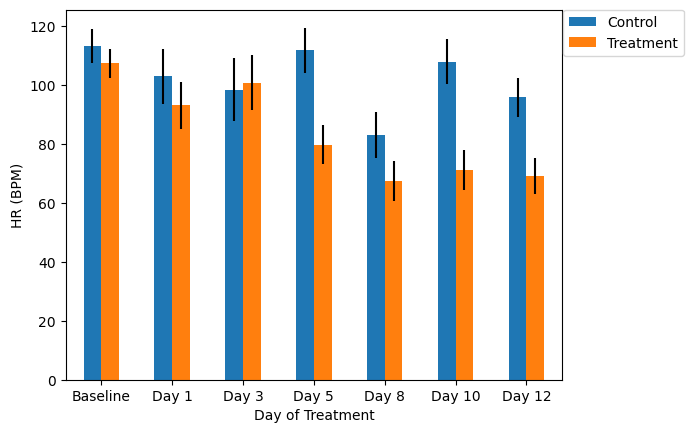

In [15]:
df_HR = pd.concat([df_combined["HRControl"], df_combined["HRTreat"]],axis=1
).rename(columns={'HRControl': 'Control', 'HRTreat': 'Treatment'})
df_HRerr = pd.concat([df_combinederr["HRConterr"], df_combinederr["HRTreaterr"]],axis=1
).rename(columns={'HRConterr': 'Control', 'HRTreaterr': 'Treatment'})
HRPlot = df_HR.plot(kind='bar',yerr=df_HRerr).legend(bbox_to_anchor=(1.26, 1.02))
plt.xlabel("Day of Treatment")
plt.ylabel("HR (BPM)")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Day 1'),
  Text(2, 0, 'Day 3'),
  Text(3, 0, 'Day 5'),
  Text(4, 0, 'Day 8'),
  Text(5, 0, 'Day 10'),
  Text(6, 0, 'Day 12')])

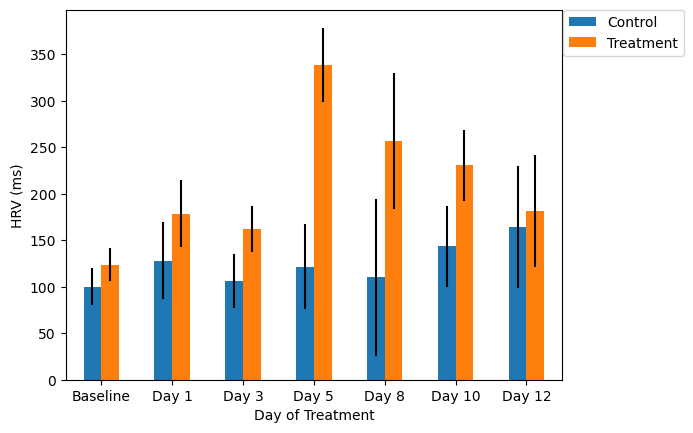

In [16]:
df_HRV = pd.concat(
    [
        df_combined["HRVControl"], 
        df_combined["HRVTreat"] 
    ],
    axis=1
).rename(columns={'HRVControl': 'Control', 'HRVTreat': 'Treatment'})
df_HRVerr = pd.concat([df_combinederr["HRVConterr"], df_combinederr["HRVTreaterr"]],axis=1
).rename(columns={'HRVConterr': 'Control', 'HRVTreaterr': 'Treatment'})
HRVPlot = df_HRV.plot(kind='bar',yerr=df_HRVerr).legend(bbox_to_anchor=(1.26, 1.02))
plt.xlabel("Day of Treatment")
plt.ylabel("HRV (ms)")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Day 1'),
  Text(2, 0, 'Day 3'),
  Text(3, 0, 'Day 5'),
  Text(4, 0, 'Day 8'),
  Text(5, 0, 'Day 10'),
  Text(6, 0, 'Day 12')])

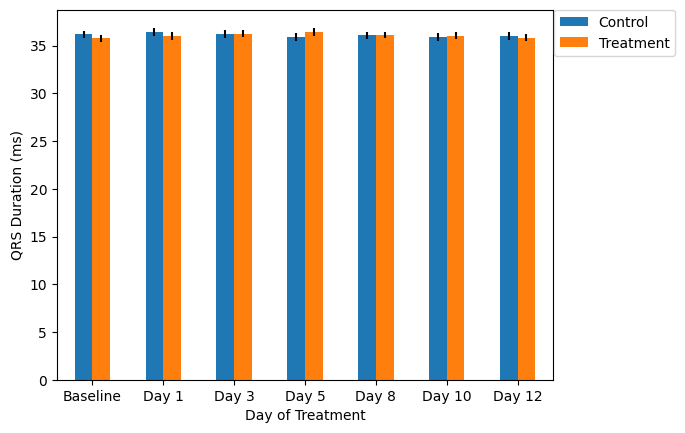

In [17]:
df_QRS = pd.concat(
    [
        df_combined["QRSControl"], 
        df_combined["QRSTreat"] 
    ],
    axis=1
).rename(columns={'QRSControl': 'Control', 'QRSTreat': 'Treatment'})
df_QRSerr = pd.concat([df_combinederr["QRSConterr"], df_combinederr["QRSTreaterr"]],axis=1
).rename(columns={'QRSConterr': 'Control', 'QRSTreaterr': 'Treatment'})
QRSPlot = df_QRS.plot(kind='bar',yerr=df_QRSerr).legend(bbox_to_anchor=(1.26, 1.02))
plt.xlabel("Day of Treatment")
plt.ylabel("QRS Duration (ms)")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Day 1'),
  Text(2, 0, 'Day 3'),
  Text(3, 0, 'Day 5'),
  Text(4, 0, 'Day 8'),
  Text(5, 0, 'Day 10'),
  Text(6, 0, 'Day 12')])

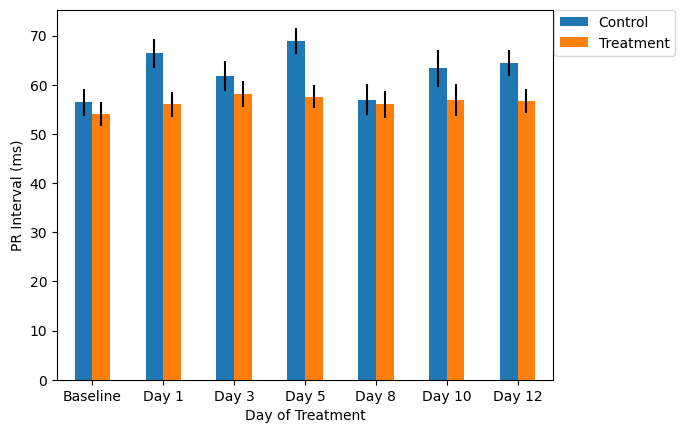

In [18]:
df_PR = pd.concat(
    [
        df_combined["PRControl"], 
        df_combined["PRTreat"] 
    ],
    axis=1
).rename(columns={'PRControl': 'Control', 'PRTreat': 'Treatment'})
df_PRerr = pd.concat([df_combinederr["PRConterr"], df_combinederr["PRTreaterr"]],axis=1
).rename(columns={'PRConterr': 'Control', 'PRTreaterr': 'Treatment'})
PRPlot = df_PR.plot(kind='bar',yerr=df_PRerr).legend(bbox_to_anchor=(1.26, 1.02))
plt.xlabel("Day of Treatment")
plt.ylabel("PR Interval (ms)")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'Day 1'),
  Text(2, 0, 'Day 3'),
  Text(3, 0, 'Day 5'),
  Text(4, 0, 'Day 8'),
  Text(5, 0, 'Day 10'),
  Text(6, 0, 'Day 12')])

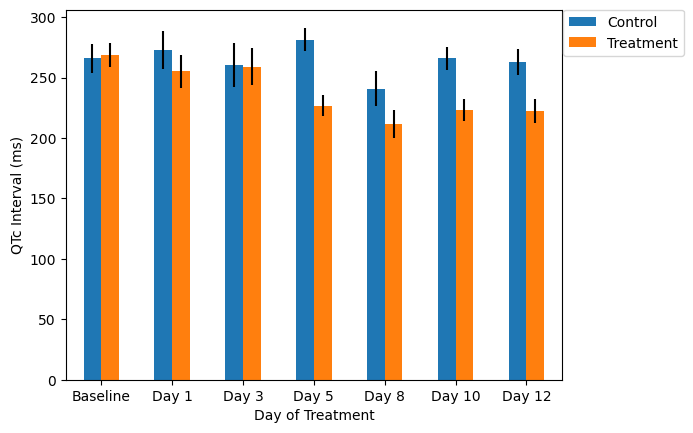

In [19]:
df_QTc = pd.concat(
    [
        df_combined["QTcControl"], 
        df_combined["QTcTreat"] 
    ],
    axis=1
).rename(columns={'QTcControl': 'Control', 'QTcTreat': 'Treatment'})
df_QTcerr = pd.concat([df_combinederr["QTcConterr"], df_combinederr["QTcTreaterr"]],axis=1
).rename(columns={'QTcConterr': 'Control', 'QTcTreaterr': 'Treatment'})
QTcPlot = df_QTc.plot(kind='bar',yerr=df_QTcerr).legend(bbox_to_anchor=(1.26, 1.02))
plt.xlabel("Day of Treatment")
plt.ylabel("QTc Interval (ms)")
plt.xticks(rotation=0)